<a href="https://colab.research.google.com/github/shahabday/NLP_learning/blob/main/DSR_41_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info = True
)

dataset_train_original = dataset[0]
dataset_validate_original = dataset[1]
dataset_test_original = dataset[2]
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
    

In [3]:
vocabulary_size = 10_000 # SOTA. Usually way bigger.
sequence_length = 128 # SOTA. Aka context size. New!

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length, # New!
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"  # New!
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(2048))

In [4]:
def render_history(history):
    plt.title("Training loss vs. validation loss")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Training accuracy vs. validation accuracy")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

In [9]:

dataset_train = dataset_train_original.cache() # lift it to memory
dataset_train = dataset_train.shuffle(25000)
dataset_train = dataset_train.batch(32)

dataset_validate = dataset_test_original.cache()
dataset_validate = dataset_validate.batch(32)

dataset_test = dataset_test_original.cache()
dataset_test = dataset_test.batch(32)


In [11]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(vocabulary_size, 32))
model.add(layers.LSTM(64))
model.add(layers.Dense(1,activation='sigmoid'))
model.build(input_shape=(None,))
model.summary()


model.compile(

              optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)


history = model.fit(

                    dataset_train,
                    epochs = 10,
                    validation_data = dataset_validate

)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 128, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,897 (1.32 MB)

 Trainable params: 344,897 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.5674 - loss: 0.6742 - val_accuracy: 0.5527 - val_loss: 0.6971
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.6184 - loss: 0.6443 - val_accuracy: 0.7402 - val_loss: 0.5759
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7380 - loss: 0.5381 - val_accuracy: 0.7839 - val_loss: 0.4995
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.8271 - loss: 0.4258 - val_accuracy: 0.7881 - val_loss: 0.4892
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.8627 - loss: 0.3597 - val_accuracy: 0.7881 - val_loss: 0.5277
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.8818 - loss: 0.3176 - val_accuracy: 0.8099 - val_loss: 0.4693
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.9016 - loss: 0.2733 - val_accuracy: 0.8076 - val_loss: 0.4749
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9174 - loss: 0.2267 - 

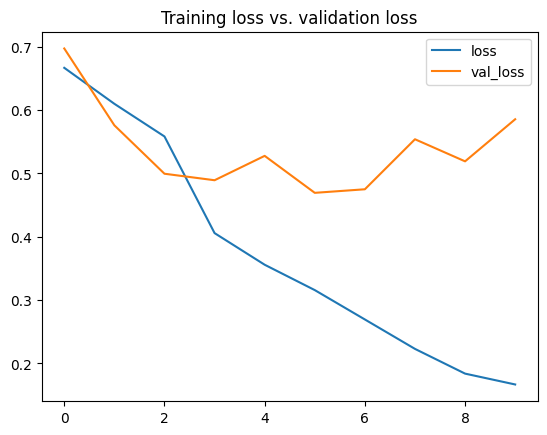

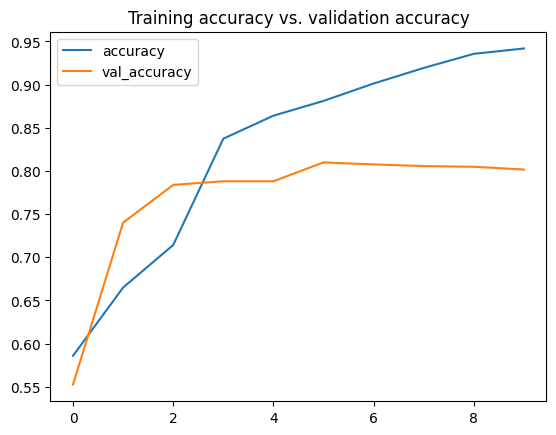

In [12]:
render_history (history)